In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import sys

In [75]:
sns.set_style("whitegrid")

file_path = "D:\Documents\GitHub\eCVT\CFP\DistanceTest_2019_11_14_15_38_21_Test4_Revving_More.csv"

   Time (s)  Range (mm)  Lumens (0dB)
0      0.63          63         13.39
1      0.92          53         13.23
2      1.12          66         13.25
3      1.90          67         13.70
4      2.07          64         13.86


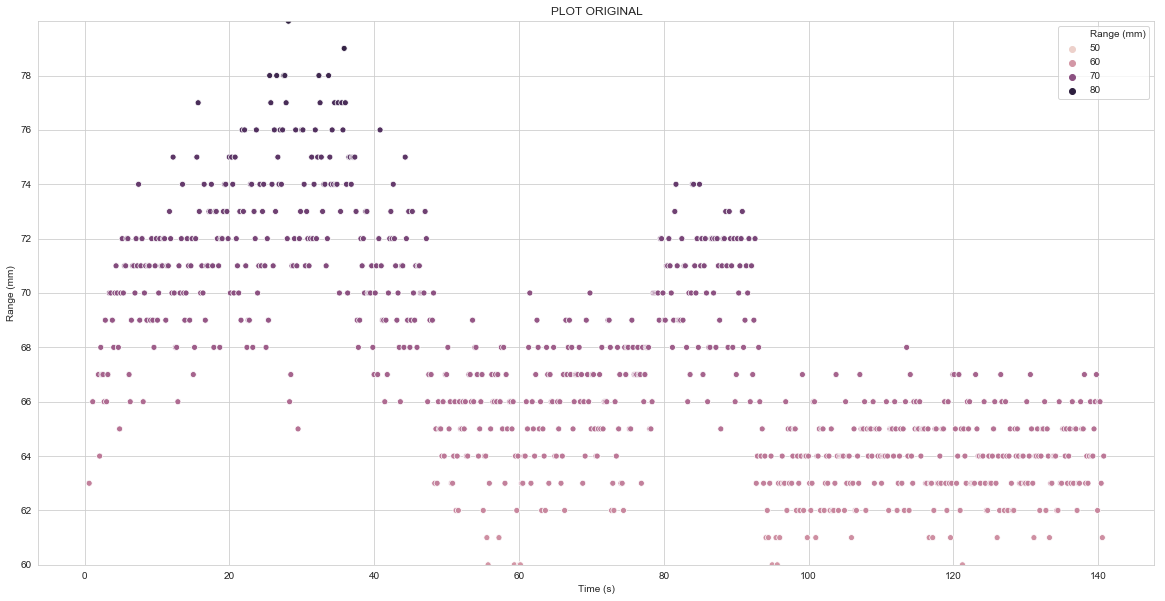

In [76]:
dfOriginal = pd.read_csv(file_path, encoding = 'utf-8')

print(dfOriginal.head())

ax = sns.scatterplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, hue = "Range (mm)")
ax.set_ylim([60, 80])
plt.title("PLOT ORIGINAL")
plt.yticks(np.arange(60, 80, step = 2))

fig = plt.gcf() # get current figures
fig.set_size_inches(20, 10)

   Time (s)  Range (mm)  Range Avg 5 (mm)  Range Avg 10 (mm)  \
0      0.63          63               NaN                NaN   
1      0.92          53               NaN                NaN   
2      1.12          66               NaN                NaN   
3      1.90          67               NaN                NaN   
4      2.07          64              62.6                NaN   

   Range Avg 15 (mm)  Range Avg (mm)  Lumens (0dB)  Range Avg 30 (mm)  
0                NaN             NaN         13.39                NaN  
1                NaN             NaN         13.23                NaN  
2                NaN             NaN         13.25                NaN  
3                NaN             NaN         13.70                NaN  
4                NaN             NaN         13.86                NaN  


AttributeError: module 'datetime' has no attribute 'now'

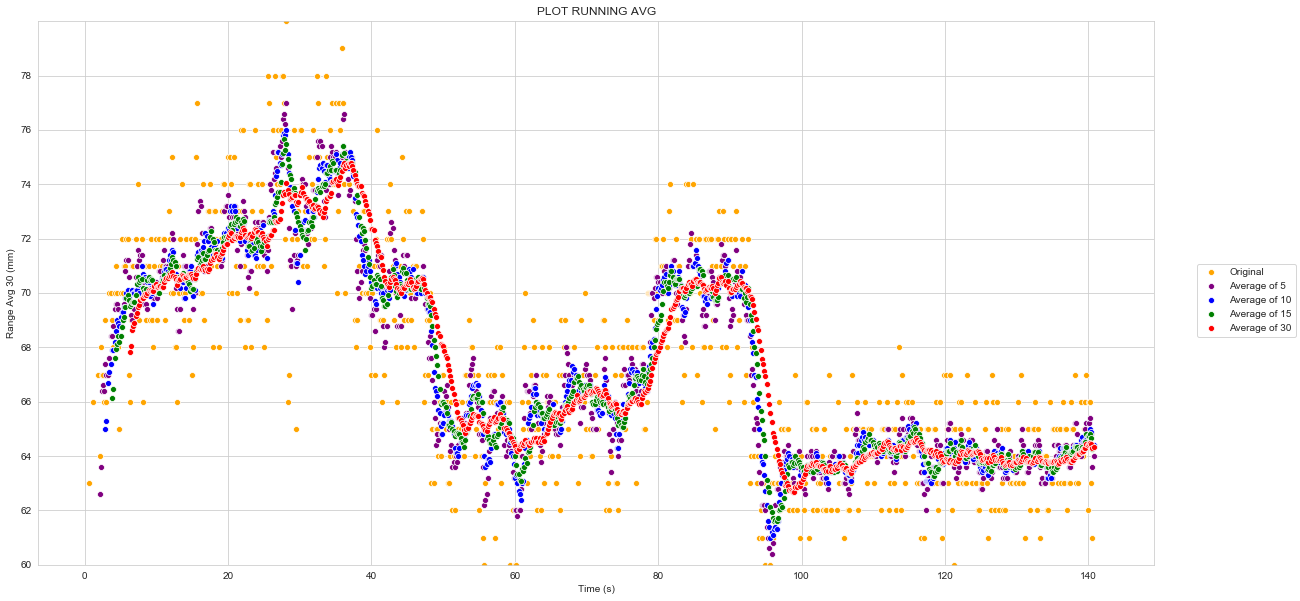

In [73]:
dfAveraged = dfOriginal

try:
    dfAveraged.insert(2, "Range Avg 5 (mm)", value = np.NaN)
    dfAveraged.insert(2, "Range Avg 10 (mm)", value = np.NaN)
    dfAveraged.insert(3, "Range Avg 15 (mm)", value = np.NaN)
    dfAveraged.insert(3, "Range Avg 30 (mm)", value = np.NaN)
except ValueError:
    pass

dfAveraged["Range Avg 5 (mm)"] = dfAveraged.rolling(window = 5)["Range (mm)"].mean() 
dfAveraged["Range Avg 10 (mm)"] = dfAveraged.rolling(window = 10)["Range (mm)"].mean() 
dfAveraged["Range Avg 15 (mm)"] = dfAveraged.rolling(window = 15)["Range (mm)"].mean() 
dfAveraged["Range Avg 30 (mm)"] = dfAveraged.rolling(window = 30)["Range (mm)"].mean() 

print(dfAveraged.head())

ax = sns.scatterplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, color = "orange")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 5 (mm)", data = dfOriginal, color = "purple")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 10 (mm)", data = dfOriginal, color = "blue")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 15 (mm)", data = dfOriginal, color = "green")
ax = sns.scatterplot(x = "Time (s)", y = "Range Avg 30 (mm)", data = dfOriginal, color = "red")

ax.set_ylim([60, 80])
plt.title("PLOT RUNNING AVG")
plt.yticks(np.arange(60, 80, step = 2))

fig = plt.gcf() # get current figures
fig.legend(labels = ["Original", "Average of 5", "Average of 10", "Average of 15", "Average of 30"], loc = "right")
fig.set_size_inches(20, 10)

currentDT = datetime.now()
fig.savefig("Running_Avg_Comparison_Test4_" + currentDT.strftime("%Y_%m_%d_%H_%M_%S") + ".pdf", dpi = 2400)
print("Figure saved")